## Histogram and Equalization

In [12]:
from PIL import Image
from pylab import *
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import scipy.misc, math

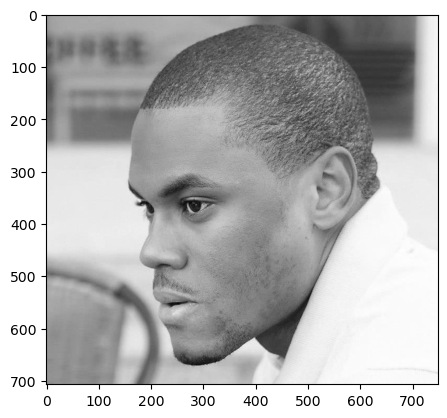

In [3]:
img = Image.open('C:/Users/Misab/Desktop/Image processing/data/profile.jpg').convert('L')
img_array = array(img)

plt.imshow(img_array, cmap = cm.gray)

(array([3.0000e+01, 5.1000e+01, 9.3000e+01, 1.6200e+02, 2.0600e+02,
        3.7400e+02, 5.7900e+02, 7.5800e+02, 8.3700e+02, 1.0430e+03,
        2.9350e+03, 6.5750e+03, 4.7490e+03, 4.3790e+03, 5.4800e+03,
        6.9850e+03, 9.6170e+03, 1.0647e+04, 1.0990e+04, 1.1989e+04,
        1.1920e+04, 1.3369e+04, 1.4990e+04, 1.2772e+04, 1.2886e+04,
        1.6506e+04, 1.5696e+04, 1.9708e+04, 2.3524e+04, 2.0244e+04,
        1.9610e+04, 1.9933e+04, 2.2432e+04, 2.2259e+04, 1.5875e+04,
        1.1372e+04, 9.5960e+03, 6.6490e+03, 5.7640e+03, 5.9260e+03,
        3.3590e+03, 4.2580e+03, 5.5850e+03, 6.3140e+03, 1.1251e+04,
        3.0812e+04, 2.1583e+04, 1.2749e+04, 2.4100e+04, 3.0022e+04]),
 array([  1.  ,   6.04,  11.08,  16.12,  21.16,  26.2 ,  31.24,  36.28,
         41.32,  46.36,  51.4 ,  56.44,  61.48,  66.52,  71.56,  76.6 ,
         81.64,  86.68,  91.72,  96.76, 101.8 , 106.84, 111.88, 116.92,
        121.96, 127.  , 132.04, 137.08, 142.12, 147.16, 152.2 , 157.24,
        162.28, 167.32, 172.36

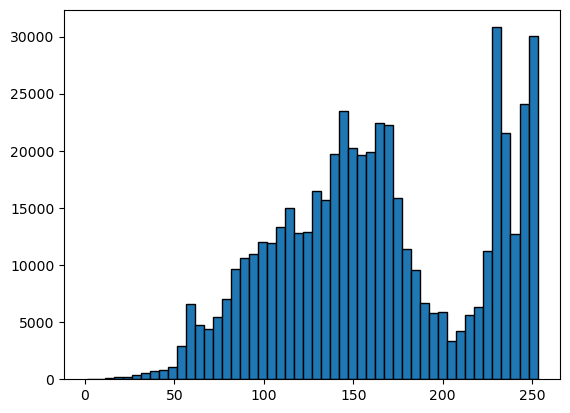

In [11]:
plt.hist(img_array.flatten(), 50, edgecolor = 'black')

Equalizing an image histogram

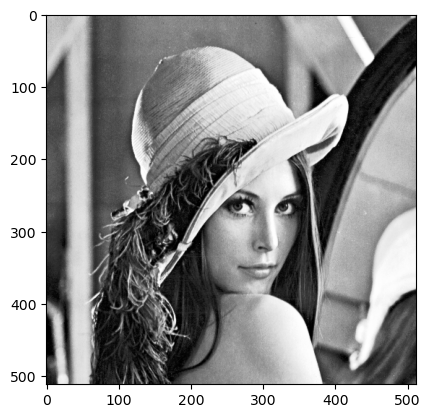

In [15]:
img = Image.open('C:/Users/Misab/Desktop/Image processing/data/lena512.bmp')

img_arr = np.asarray(img)

fl = img_arr.flatten()

hist, bins = np.histogram(fl, 256, (0,255))

## cumulative distribution funcion

cdf = hist.cumsum()

cdf_m = np.ma.masked_equal(cdf,0)

num_cdf_m = (cdf_m - cdf_m.min()) * 255

den_cdf_m = (cdf_m.max()-cdf_m.min())

cdf_m = num_cdf_m / den_cdf_m

cdf = np.ma.filled(cdf_m,0).astype('uint8')

im = cdf[fl]

im_new = np.reshape(im, img_arr.shape)

im4 = Image.fromarray(im_new)

plt.imshow(im4, cmap = cm.gray)

(array([5.2600e+02, 3.7650e+03, 1.1072e+04, 1.5802e+04, 9.4570e+03,
        6.0430e+03, 6.6900e+03, 6.4010e+03, 7.2130e+03, 1.2006e+04,
        1.3215e+04, 1.0009e+04, 1.1719e+04, 1.4226e+04, 1.5864e+04,
        1.6725e+04, 1.6349e+04, 1.7712e+04, 1.5929e+04, 8.7880e+03,
        8.5350e+03, 6.0460e+03, 5.2800e+03, 6.2570e+03, 7.6360e+03,
        6.0200e+03, 2.2310e+03, 5.9300e+02, 3.0000e+01, 5.0000e+00]),
 array([ 25.        ,  32.33333333,  39.66666667,  47.        ,
         54.33333333,  61.66666667,  69.        ,  76.33333333,
         83.66666667,  91.        ,  98.33333333, 105.66666667,
        113.        , 120.33333333, 127.66666667, 135.        ,
        142.33333333, 149.66666667, 157.        , 164.33333333,
        171.66666667, 179.        , 186.33333333, 193.66666667,
        201.        , 208.33333333, 215.66666667, 223.        ,
        230.33333333, 237.66666667, 245.        ]),
 <BarContainer object of 30 artists>)

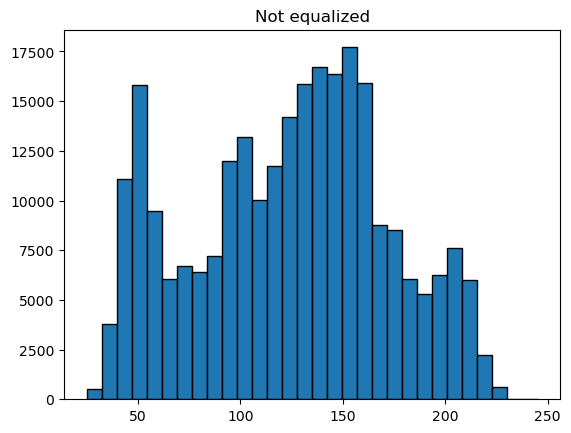

In [20]:
plt.title('Not equalized')
plt.hist(fl, 30, edgecolor = 'black')

(array([ 8081.,  9348.,  8180.,  8778.,  9052.,  8163., 10054.,  7731.,
         9588.,  7875.,  8426.,  8365., 10277.,  7518.,  9093.,  7135.,
        10131.,  8327.,  9510.,  6963.,  9128., 10398.,  7557.,  9591.,
         9055.,  8614.,  9156.,  7868.,  9303.,  8879.]),
 array([  0. ,   8.5,  17. ,  25.5,  34. ,  42.5,  51. ,  59.5,  68. ,
         76.5,  85. ,  93.5, 102. , 110.5, 119. , 127.5, 136. , 144.5,
        153. , 161.5, 170. , 178.5, 187. , 195.5, 204. , 212.5, 221. ,
        229.5, 238. , 246.5, 255. ]),
 <BarContainer object of 30 artists>)

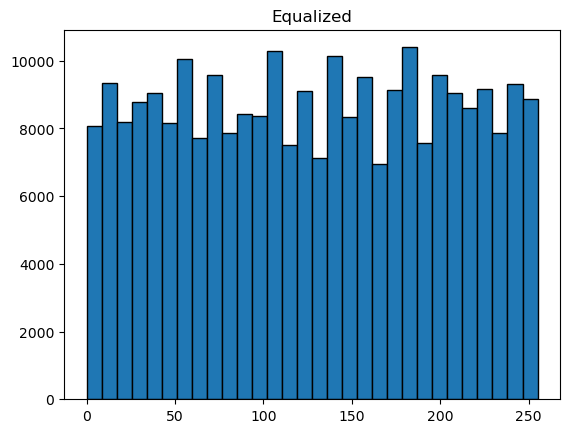

In [21]:
plt.title('Equalized')
plt.hist(im,30, edgecolor='black')